# Louvain Method

## 1. Introduction:
Louvain method is a greedy algorithm for community detection. It is fast and scalable.

- The algorithm is based on the modularity optimization.
- Modularity is a measure of the quality of a particular division of a network into communities.
- The modularity is defined as the fraction of the edges that fall within the given groups minus the expected fraction if edges were distributed at random.
- The modularity is maximized by the Louvain method.

### 1.1. Modularity:
- The modularity is defined as:
$$  Q = \frac{1}{2m} \sum_{ij} \left( A_{ij} - \frac{k_i k_j}{2m} \right) \delta(c_i, c_j) $$
    - $A_{ij}$ is the weight of the edge between nodes $i$ and $j$.
    - $k_i$ is the sum of the weights of the edges attached to node $i$.
    - $c_i$ is the community to which node $i$ belongs.
    - $m$ is the sum of the weights of all the edges in the network.
    - $\delta(c_i, c_j)$ is 1 if $c_i = c_j$ and 0 otherwise.

- The modularity can be rewritten as:
$$ Q = \frac{1}{2m} \sum_{ij} \left( A_{ij} - \frac{k_i k_j}{2m} \right) \frac{\delta(c_i, c_j) + \delta(c_j, c_i)}{2} $$



## 2. Algorithm:
### 2.1. Initialization:
- Each node is assigned to a community.
- The initial community of each node is itself.
- The initial modularity is 0.

### 2.2. Iteration:
- For each node, the algorithm tries to move it to the community of each of its neighbors.
- The modularity is calculated for each move.
- The node is moved to the community that gives the maximum modularity gain.
- The iteration stops when no modularity gain is possible.

## 4. Implementation:
### 4.1. Data Structure:
- The algorithm uses a graph data structure.
- The graph is represented as an adjacency list.
- The graph is undirected and unweighted.
- The graph is stored as a dictionary.
- The keys of the dictionary are the nodes.
- The values of the dictionary are the neighbors of the nodes.
- The neighbors of a node are stored as a set.

## References:
- The algorithm is described in the paper: Fast unfolding of communities in large networks, Vincent D Blondel, Jean-Loup Guillaume, Renaud Lambiotte, Etienne Lefebvre, Journal of Statistical Mechanics: Theory and Experiment 2008(10), P10008 (12pp).

In [ ]:
# install community package
!conda install -c community --yes

Node 0: Community 2
Node 1: Community 1
Node 2: Community 1
Node 3: Community 1
Node 4: Community 2
Node 5: Community 2
Node 6: Community 2
Node 7: Community 1
Node 8: Community 3
Node 9: Community 3
Node 10: Community 2
Node 11: Community 2
Node 12: Community 1
Node 13: Community 1
Node 14: Community 3
Node 15: Community 3
Node 16: Community 2
Node 17: Community 2
Node 18: Community 3
Node 19: Community 2
Node 20: Community 3
Node 21: Community 2
Node 22: Community 3
Node 23: Community 3
Node 24: Community 0
Node 25: Community 0
Node 26: Community 3
Node 27: Community 3
Node 28: Community 0
Node 29: Community 3
Node 30: Community 3
Node 31: Community 0
Node 32: Community 3
Node 33: Community 3

Communities:
Community 2: [0, 4, 5, 6, 10, 11, 16, 17, 19, 21]
Community 1: [1, 2, 3, 7, 12, 13]
Community 3: [8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30, 32, 33]
Community 0: [24, 25, 28, 31]


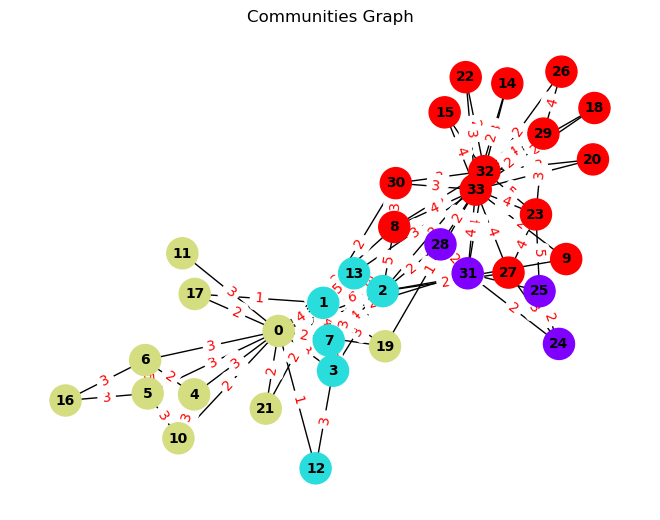

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import community  # Louvain algorithm is available through this package

# Create a sample graph (you can replace this with your own graph data)
G = nx.karate_club_graph()

# Finding the communities using the Louvain method
partition = community.best_partition(G)

# Community assignments
for node, community_id in partition.items():
    print(f"Node {node}: Community {community_id}")

# Listing nodes in each community
communities = {}
for node, community_id in partition.items():
    if community_id in communities:
        communities[community_id].append(node)
    else:
        communities[community_id] = [node]

# Printing communities
print("\nCommunities:")
for community_id, nodes in communities.items():
    print(f"Community {community_id}: {nodes}")

# Create a list of colors for nodes based on their community
community_colors = [partition[node] for node in G.nodes()]

# Define a layout for the graph
layout = nx.spring_layout(G)

# Draw the nodes and edges with community-based colors
nx.draw(G, pos=layout, with_labels=True, node_color=community_colors, cmap=plt.cm.rainbow, node_size=500, font_size=10, font_color='black', font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=edge_labels, font_color='red')

# Show the graph
plt.title("Communities Graph")
plt.show()